# Information Retrieval - Assigment 5
Group 3: Hooshyar Hosna, Lima Rachel, Lorefice Alessandra

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Import-the-Tweets" data-toc-modified-id="Import-the-Tweets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import the Tweets</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Function-for-Cleaning" data-toc-modified-id="Function-for-Cleaning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Function for Cleaning</a></span></li><li><span><a href="#Functions-for-Preprocessing" data-toc-modified-id="Functions-for-Preprocessing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Functions for Preprocessing</a></span></li><li><span><a href="#Create-Term-Dictionary-and-Document-Term-Matrix" data-toc-modified-id="Create-Term-Dictionary-and-Document-Term-Matrix-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Create Term Dictionary and Document Term Matrix</a></span></li></ul></li><li><span><a href="#Task-1" data-toc-modified-id="Task-1-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Task 1</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Latent-Semantic-Indexing" data-toc-modified-id="Latent-Semantic-Indexing-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Latent Semantic Indexing</a></span><ul class="toc-item"><li><span><a href="#M=5,-N=10" data-toc-modified-id="M=5,-N=10-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>M=5, N=10</a></span></li><li><span><a href="#M=10,-N=15" data-toc-modified-id="M=10,-N=15-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>M=10, N=15</a></span></li><li><span><a href="#M=15,-N=20" data-toc-modified-id="M=15,-N=20-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>M=15, N=20</a></span></li><li><span><a href="#Total" data-toc-modified-id="Total-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Total</a></span></li></ul></li></ul></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Task 2</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Finding-the-optimal-number-of-topics" data-toc-modified-id="Finding-the-optimal-number-of-topics-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Finding the optimal number of topics</a></span></li><li><span><a href="#Extra----Create-a-tf-idf-model" data-toc-modified-id="Extra----Create-a-tf-idf-model-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Extra -  Create a tf-idf model</a></span></li></ul></li></ul></li><li><span><a href="#Difficulties-faced" data-toc-modified-id="Difficulties-faced-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Difficulties faced</a></span></li></ul></div>

## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.tokenize import word_tokenize, TweetTokenizer
from wordsegment import load, segment
load()
import nltk
from nltk.stem import WordNetLemmatizer
import gensim as gs
from gensim.corpora import Dictionary
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import Binarizer
import numpy as np
import random
import time
from datetime import timedelta
from numpy.linalg import matrix_rank
from copy import deepcopy
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import pprint
from gensim import corpora
from gensim.models import TfidfModel, LsiModel, hdpmodel, CoherenceModel
 
#warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\alelo\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## Import the Tweets

In [2]:
#read textual documents from file
documents_path = 'data\Lab_Corpus.txt'
with open(documents_path, 'r', encoding='utf-8') as doc_f:
    corpus_list = doc_f.readlines()

In [3]:
corpus_list

['"","x"\n',
 '"1","No-code data science is easier than you think.  Learn how to start building models in minutes at our 3-day conference — completely free."\n',
 '"2","@Mikeyanlam @ARKInvest @richard_chu97 @Soumyazen @TerraPharma1 Teladoc before livongo acquisition is just zoom doctor. That business have a lot competition, everybody think they can do it, Amazon, Walmart etc. However, Livongo changes the picture since there’s data science part not so easy to replicate. It’s dead money until livongo pick up."\n',
 '"3","@niajmattu @RachelBitecofer @Davidj2040 @EvanMcMullin Because beyond that they don’t agree on anything. People think the aversion to data science and fact is a far right thing. It’s just a general right thing."\n',
 '"4","@blairnilsson BLAIR!! thank you. I will check the dates and see what i can spin up. I\'m more data science than data sec *right* now but I also think I\'d love to see what the community is up to!"\n',
 '"5","@RoshenSethna @Jan_Ainali @ryanko @NavaPBC @M

We decided to build a dataframe with the tweets in order to have them together with hashtags and mentions.

In [4]:
tweet_df = pd.read_csv(documents_path, names=['index', 'original_tweet'])
tweet_df = tweet_df.drop(columns=['index'], axis=1)
tweet_df = tweet_df.iloc[1:,]
tweet_df.head(10)

,original_tweet
1,No-code data science is easier than you think....
2,@Mikeyanlam @ARKInvest @richard_chu97 @Soumyaz...
3,@niajmattu @RachelBitecofer @Davidj2040 @EvanM...
4,@blairnilsson BLAIR!! thank you. I will check ...
5,@RoshenSethna @Jan_Ainali @ryanko @NavaPBC @Ma...
6,@MehNitesh2 @JoTrader4 @WholeMarsBlog Data wil...
7,"Feel free to comment, we did love to hear your..."
8,"Feel free to comment, we did love to hear your..."
9,No-code data science is easier than you think....
10,"Probably unpopular opinion, but I think it’s g..."


In [5]:
tweet_df['hashtag'] = tweet_df['original_tweet'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))
tweet_df['tag'] = tweet_df['original_tweet'].apply(lambda x: re.findall(r'\B@\w*[a-zA-Z]+\w*', x))
tweet_df.head(10)

,original_tweet,hashtag,tag
1,No-code data science is easier than you think....,[],[]
2,@Mikeyanlam @ARKInvest @richard_chu97 @Soumyaz...,[],"[@Mikeyanlam, @ARKInvest, @richard_chu97, @Sou..."
3,@niajmattu @RachelBitecofer @Davidj2040 @EvanM...,[],"[@niajmattu, @RachelBitecofer, @Davidj2040, @E..."
4,@blairnilsson BLAIR!! thank you. I will check ...,[],[@blairnilsson]
5,@RoshenSethna @Jan_Ainali @ryanko @NavaPBC @Ma...,[],"[@RoshenSethna, @Jan_Ainali, @ryanko, @NavaPBC..."
6,@MehNitesh2 @JoTrader4 @WholeMarsBlog Data wil...,[],"[@MehNitesh2, @JoTrader4, @WholeMarsBlog]"
7,"Feel free to comment, we did love to hear your...","[#DataScience, #AI, #ML, #polltime, #DSDojo]",[]
8,"Feel free to comment, we did love to hear your...","[#DataScience, #AI, #ML, #polltime, #DSDojo]",[]
9,No-code data science is easier than you think....,[],[]
10,"Probably unpopular opinion, but I think it’s g...",[],[]


## Preprocessing

Our steps:

1. Cleaning
2. Tokenize
3. Select distinct terms
3. Removing stop words 
4. Lemmatization
5. Omitting terms with length lower than 3

Output:

- Terms Dictionary
- Document Term Matrix

### Function for Cleaning


1. Remove HTTP/HTTPS and URLs
2. Remove punctuations
3. Remove emojis
4. Split words 
5. Remove digits
6. Convert text to lower case

In [6]:
def cleaning(tweet):
    
    # to remove links that start with HTTP/HTTPS in the tweet
    tweet = re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)", 
                   "", tweet, flags=re.MULTILINE)
    
    # to remove other url links
    tweet = re.sub(r"[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)", 
                   "", tweet, flags=re.MULTILINE)
      
    # to remove punctuations
    tweet = ' '.join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    
    # to remove emojis:
    tweet = ''.join(re.sub(r'[^\w\s,]', ' ', tweet))
    
    # to split words that are together
    tweet = ''.join([a for a in re.split('([A-Z][a-z]+)', tweet) if a])

    # to remove digits
    tweet = re.sub(r"\d", "", tweet)

    #to lower the characters in a text
    tweet = tweet.lower()
    
    return tweet

### Functions for Preprocessing

In [7]:
def createTokens(collection):
    
    '''
    given a collection as input, it gives a list of all the tokens of that collection
    and a list lists where each list contains the tokens for that document of the collection
    
    '''
    tknzr = TweetTokenizer()
    
    #create create a list of lists for the tokens of each document
    tokenized_collection = []

    for doc in collection:
        tokenized_collection.append(tknzr.tokenize(doc))        
            
    return tokenized_collection

In [8]:
def splitWords(tokens):
    
    '''
    given a list of tokens it divides words that are together
    
    e.g. datascience -> data science
    
    '''
    
    splitted = []
    
    for term in tokens:
        term = ' '.join(segment(term))
        splitted.append(term) 
        
    tknzr = TweetTokenizer()
    splitted_tokens = [tknzr.tokenize(st) for st in splitted]
    
    tokens = []

    for doc_tokens in splitted_tokens:
        for word in doc_tokens:
            tokens.append(word)
    
    return tokens

In [9]:
def removeStopWords(terms):
    
    '''
    given as input a list of terms and the number of stop words to be removed, 
    it gives a list of terms removing those stop words stop words
    if the number of stop words is bigger than the total number of stop words we have
    it will remove the maximum number of stop words possible
    
    '''

    terms_no_stopwords = []
    stop_words = nltk.corpus.stopwords.words('english')
    
    for term in terms:
        if term not in stop_words:
            terms_no_stopwords.append(term)
            
    return terms_no_stopwords

We chose lemmatization instead of stemming because by using stemming we got, for example, *science -> scienc* and this is not what we wanted.

In [10]:
def lemmatization (terms):
    
    '''
    given a list of tokens it lemmatizes each token
    
    '''

    wordnet_lemmatizer = WordNetLemmatizer()

    lemma_terms = []

    for term in terms:
        lemma_terms.append(wordnet_lemmatizer.lemmatize(term))
        
    return lemma_terms

Below you can find the function used for omitting terms. We used a threshold of 2 instead of 3 since we want to keep acronymus like *AI*, *ML*, etc.

In [11]:
def omittingShortTerms(terms):
    
    '''
    if the words are short this will be omitted from the text
    '''

    #the stemmer requires a language parameter
    
    terms_kept = []
    
    for term in terms:
        if len(term)>=2:
            terms_kept.append(term)

    return terms_kept

In the function below we put everything together to have a faster way to do preprocessing.

In [12]:
def preprocessing(clean_documents):
    
    '''
    given a document it preprocess it following these steps:
        - tokenize
        - split words
        - remove stop words
        - lemmatize
        - omitting short terms
    
    '''
    
    final = []
    
    #tokenize
    tokens = createTokens(clean_documents)
        
    for t in tokens:
        
        #split words 
        split = splitWords(t)
        
        #remove stop words
        no_sw = removeStopWords(split)
    
        #lemmatization
        lemma = lemmatization(no_sw)

        #omitting terms with lenght = 1
        final.append(omittingShortTerms(lemma))
    
    return final

### Create Term Dictionary and Document Term Matrix 

In [13]:
#create term dictionary using gensim.corpora.Dictionary

final_corpus = []

for tweet in list(tweet_df['original_tweet']):
    tweet = cleaning(tweet)
    final_corpus.append(tweet)
    
preprocess_tokens = preprocessing(final_corpus)
dct = Dictionary(preprocess_tokens)
print('We have '+str(dct.num_docs)+' documents and '+str(len(dct.token2id))+' terms in our collection.')

We have 803 documents and 2744 terms in our collection.


In [14]:
#build the cleaned corpus of tweets

preprocess_tweets = [TreebankWordDetokenizer().detokenize(pt) for pt in preprocess_tokens]

Below the Document Term Matrix is shown. In this matrix each row corresponds to one term of the collection and each column to one document. 

Thus $a_{i,j} = $ frequency of term $i$ in document $j$, $\forall i \in [0, 2476], \forall j \in [0,802]$.



In [15]:
vectorizer = CountVectorizer(decode_error='strict', vocabulary=dct.token2id.keys(), min_df=0)

#Document-term matrix
dtm = np.transpose(vectorizer.fit_transform(preprocess_tweets))
dtm_df = pd.DataFrame(dtm.toarray(),index=vectorizer.get_feature_names())
dtm_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,793,794,795,796,797,798,799,800,801,802
building,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
code,1,0,0,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
completely,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
conference,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
data,1,1,1,2,1,4,2,2,1,2,...,1,1,1,1,1,1,1,1,1,1
day,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
easier,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
free,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
learn,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,0,0
minute,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
dtm.shape

(2744, 803)

## Task 1

### Functions

Here we grouped all the functions we used in task 1.

In [17]:
def selectDocuments(from_collection, documents_number):
    
    '''
    given a collection of documents, it selects randomly n=documents_number of documents from the collection
    
    '''
      
    collection = from_collection
    docs = []

    for i in range(documents_number):
        docs.append(random.choice(collection))

    
    return docs        

In [18]:
def vectorizer_fun(docs, terms_number):
    
    '''
    given a list of documents and the number of terms that we want to keep, it gives as input 
    the incidence matrix releted to that collection using n=terms_number terms
    
    '''   
    
    #select automatically the most frequent terms
    vectorizer =  TfidfVectorizer(max_features=terms_number, smooth_idf=True)
    
    X = vectorizer.fit_transform(docs)
    onehot = Binarizer()
    temp = onehot.fit_transform(X.toarray())
                
    temp_transpose = np.transpose(temp)
    result = pd.DataFrame(data=temp_transpose, columns=[i for i in range(temp.shape[0])], 
                          index=vectorizer.get_feature_names())
    
    return result, vectorizer

In [19]:
def computeKreduction(matrix, k):
    
    '''
    given a matrix and an index k, it computes the SVD for that matrix and creates the 
    k-rank representation
    
    '''
    
    C = matrix
    
    svd_matrixes = np.linalg.svd(C.values, full_matrices=False)
    U = svd_matrixes[0]
    S = np.diag(svd_matrixes[1])
    Vt = svd_matrixes[2]
    
    S_copy = deepcopy(S)
    S_copy[k:,] = np.zeros(shape=S[k:,].shape)
    
    Ck = np.dot(np.dot(U, S_copy), Vt)
    
    return Ck, U, S, Vt

In [20]:
def rankAndError(matrix):
    
    '''
    given a matrix, it computes the rank and the frobenius error for each k between 1 and the
    rank of the given matrix
    
    '''

    C = matrix
    results_dict = dict()
    rank_Ck = []
    frob_err = []

    for k in range(1, matrix_rank(C)):
        
        results_dict_per_k = dict()
        
        Ck = computeKreduction(C, k)[0]

        results_dict_per_k['rank'] = matrix_rank(Ck)
        results_dict_per_k['frobenius error'] = np.linalg.norm(C-Ck)
        results_dict[k] = results_dict_per_k
        
    return results_dict

Below we create a single function to do the computation.

In [21]:
def lsi_computation(from_collection, terms_number):
    
    '''
    given a collection of documents, the number of terms to be kept, it gives as output
    the incidence matrix, the results of rank and frobenius error for each Ck and the time needed for computation
    
    '''
    
    collection = from_collection
    
    #start counting time
    start_time = time.monotonic()
    
    #calcuation
    matrix, vectorizer = vectorizer_fun(collection, terms_number)
    results = rankAndError(matrix)
   
    #end counting time
    end_time = time.monotonic()
    comp_time =  timedelta(seconds=end_time - start_time)
    
    return matrix, results, comp_time

### Latent Semantic Indexing

**Pros and cons of LSI**
+ LSI is fast and easy to implement.
+ It gives decent results, much better than a plain vector space model.
- Since it is a linear model, it might not do well on datasets with non-linear dependencies.
- LSI assumes a Gaussian distribution of the terms in the documents, which may not be true for all problems.
- LSI involves SVD, which is computationally intensive and hard to update as new data comes up.
[Source](https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/)

In the following lines we compute LSI. For a better understandig of the theoretical part, we tried to compute manually each k-rank decomposition in order to compute the Frobenius error. After that, we used the pre-build method *TruncatedSVD* that does the work for us. In this way, after we chose the best number of $k$, we can visualize the relation between topics and documents and topics and terms.

As requested in the assignment, we computed the LSI for 3 matrices that have respectively
- 5 documents and 10 terms (10x5)
- 10 documents and 15 terms (15x10)
- 15 documents and 20 terms (20x15)

Just for curiosity, we also tried to run LSI for the whole collection.

#### M=5, N=10

In [22]:
docs = selectDocuments(preprocess_tweets, 5)
matrix, results, comp_time = lsi_computation(docs, 10)

In [23]:
print("Time for Computation : "+str(comp_time))

Time for Computation : 0:00:00.031000


In [24]:
matrix

,0,1,2,3,4
data,1.0,1.0,1.0,1.0,1.0
information,1.0,0.0,1.0,0.0,0.0
librarian,1.0,0.0,1.0,0.0,0.0
literacy,1.0,0.0,1.0,0.0,0.0
need,1.0,1.0,1.0,0.0,0.0
open,0.0,1.0,0.0,0.0,0.0
program,1.0,0.0,1.0,0.0,0.0
scholarly,1.0,0.0,1.0,0.0,0.0
science,1.0,1.0,1.0,0.0,1.0
think,1.0,0.0,1.0,1.0,0.0


In [25]:
print('The rank of the matrix is '+str(matrix_rank(matrix.values)))

The rank of the matrix is 4


In [26]:
results

{1: {'rank': 1, 'frobenius error': 2.3831648135767103},
 2: {'rank': 2, 'frobenius error': 1.4716199454147232},
 3: {'rank': 3, 'frobenius error': 0.8027844817015621}}

In [27]:
vectorizer = TfidfVectorizer(max_features=10, smooth_idf=True)

#Document-term matrix
tfidf_matrix = np.transpose(vectorizer.fit_transform(docs))
pd.DataFrame(tfidf_matrix.toarray(),index=vectorizer.get_feature_names(),columns=docs).head(10)

,librarian support data science information literacy scholarly communication information landscape topic broadly defined think master student need know program also graduate,perspective science need public data science need open debate finding science need open feedback change course accordingly,librarian support data science information literacy scholarly communication information landscape topic broadly defined think master student need know program also graduate,greet celtic ever get player quality lub think data analytics based scouting make hidden gem like difficult get even celtic show evidence using club,lately nerd ing first nation financial data science call someone exact interest never thought would see day honestly
data,0.184797,0.142893,0.184797,0.579739,0.645782
information,0.625778,0.000000,0.625778,0.000000,0.000000
librarian,0.312889,0.000000,0.312889,0.000000,0.000000
literacy,0.312889,0.000000,0.312889,0.000000,0.000000
need,0.259726,0.602492,0.259726,0.000000,0.000000
open,0.000000,0.599753,0.000000,0.000000,0.000000
program,0.312889,0.000000,0.312889,0.000000,0.000000
scholarly,0.312889,0.000000,0.312889,0.000000,0.000000
science,0.218490,0.506835,0.218490,0.000000,0.763522
think,0.259726,0.000000,0.259726,0.814802,0.000000


In [28]:
tfidf_matrix = tfidf_matrix.asfptype()
lsa = TruncatedSVD(3, algorithm = 'arpack')
lsa_matrix = lsa.fit_transform(tfidf_matrix)
lsa_matrix = Normalizer(copy=False).fit_transform(lsa_matrix)
pd.DataFrame(lsa_matrix, index=vectorizer.get_feature_names(), columns=["Topic 1","Topic 2", "Topic 3"])

,Topic 1,Topic 2,Topic 3
data,0.770498,0.412896,0.485644
information,0.790963,-0.579291,-0.196975
librarian,0.790963,-0.579291,-0.196975
literacy,0.790963,-0.579291,-0.196975
need,0.781970,0.181283,-0.596372
open,0.419471,0.662239,-0.620873
program,0.790963,-0.579291,-0.196975
scholarly,0.790963,-0.579291,-0.196975
science,0.765963,0.598590,-0.234502
think,0.674104,-0.154921,0.722207


In [29]:
pd.DataFrame(lsa.components_,index = ["Topic 1","Topic 2", "Topic 3"],
             columns=docs)

,librarian support data science information literacy scholarly communication information landscape topic broadly defined think master student need know program also graduate,perspective science need public data science need open debate finding science need open feedback change course accordingly,librarian support data science information literacy scholarly communication information landscape topic broadly defined think master student need know program also graduate,greet celtic ever get player quality lub think data analytics based scouting make hidden gem like difficult get even celtic show evidence using club,lately nerd ing first nation financial data science call someone exact interest never thought would see day honestly
Topic 1,0.556493,0.343468,0.556493,0.335840,0.387135
Topic 2,-0.407568,0.542250,-0.407568,0.101117,0.602924
Topic 3,-0.138584,-0.508379,-0.138584,0.828246,0.130950


In [30]:
# Compute document similarity using LSA components
similarity = np.transpose(np.asarray(np.asmatrix(lsa.components_).T * np.asmatrix(lsa.components_)))
pd.DataFrame(similarity,index=docs, columns=docs)

,librarian support data science information literacy scholarly communication information landscape topic broadly defined think master student need know program also graduate,perspective science need public data science need open debate finding science need open feedback change course accordingly,librarian support data science information literacy scholarly communication information landscape topic broadly defined think master student need know program also graduate,greet celtic ever get player quality lub think data analytics based scouting make hidden gem like difficult get even celtic show evidence using club,lately nerd ing first nation financial data science call someone exact interest never thought would see day honestly
librarian support data science information literacy scholarly communication information landscape topic broadly defined think master student need know program also graduate,0.495001,0.040587,0.495001,0.030898,-0.048442
perspective science need public data science need open debate finding science need open feedback change course accordingly,0.040587,0.670454,0.040587,-0.250882,0.393331
librarian support data science information literacy scholarly communication information landscape topic broadly defined think master student need know program also graduate,0.495001,0.040587,0.495001,0.030898,-0.048442
greet celtic ever get player quality lub think data analytics based scouting make hidden gem like difficult get even celtic show evidence using club,0.030898,-0.250882,0.030898,0.809005,0.299441
lately nerd ing first nation financial data science call someone exact interest never thought would see day honestly,-0.048442,0.393331,-0.048442,0.299441,0.530538


#### M=10, N=15

In [31]:
docs = selectDocuments(preprocess_tweets, 10)
matrix, results, comp_time = lsi_computation(docs, 15)

In [32]:
print("Time for Computation : "+str(comp_time))

Time for Computation : 0:00:00.016000


In [33]:
matrix

,0,1,2,3,4,5,6,7,8,9
analytics,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
big,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
business,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
data,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
global,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
got,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
learning,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
many,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
people,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
python,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [34]:
print('The rank of the matrix is '+str(matrix_rank(matrix.values)))

The rank of the matrix is 9


In [35]:
results

{1: {'rank': 1, 'frobenius error': 4.71168054203535},
 2: {'rank': 2, 'frobenius error': 3.892393440454805},
 3: {'rank': 3, 'frobenius error': 3.073421114460915},
 4: {'rank': 4, 'frobenius error': 2.562112054119708},
 5: {'rank': 5, 'frobenius error': 2.052502580910716},
 6: {'rank': 6, 'frobenius error': 1.4721337546138034},
 7: {'rank': 7, 'frobenius error': 1.0690889990779784},
 8: {'rank': 8, 'frobenius error': 0.7444976139213308}}

In [36]:
vectorizer = TfidfVectorizer(max_features=15, smooth_idf=True)

#Document-term matrix
tfidf_matrix = np.transpose(vectorizer.fit_transform(docs))
pd.DataFrame(tfidf_matrix.toarray(),index=vectorizer.get_feature_names(),columns=docs).head(10)

,artificial intelligence data science become two important sought technology today world many people think let dive deeper term need know read,may want think twice accepting term amp condition apps like uber without reading find worry jonathan peter professor finance data analytics csi news,big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,ever early start learning data science think excited see ebook kid start grasping core concept data science,data science need input woman machine learning day code dev community iot flutter python javascript serverless deep learning cybersecurity data science business innovation tech startup robotics data data analytics woman tech,india fight corona opinion industry start working mm data science seriously atman irb har bharat sanjay hot mp,data science data science wide rang spectrum let commit explorer always achieve goal think point valid opin ian,ofertas trabajo ops business analyst en espa equifax equifax believe knowledge drive progress global data analytics technology company play essential role global economy helping employer employee,joshua frank ceo crypto currency data analytics coin telegraph people turn dog eco show make anything work even odds said many time think always technology adoption case doge,lens ter int egg roll kn bink think favorite worked python data science year got job wanted work want go back python
analytics,0.000000,0.712152,0.000000,0.000000,0.191594,0.000000,0.000000,0.273391,0.390956,0.000000
big,0.000000,0.000000,0.885879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
business,0.000000,0.000000,0.000000,0.000000,0.246318,0.000000,0.000000,0.351478,0.000000,0.000000
data,0.226650,0.398193,0.163764,0.318243,0.428513,0.353002,0.553392,0.152864,0.218599,0.178799
global,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.826919,0.000000,0.000000
got,0.000000,0.000000,0.376539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.411110
learning,0.000000,0.000000,0.000000,0.365865,0.492637,0.000000,0.000000,0.000000,0.000000,0.000000
many,0.521133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.502622,0.000000
people,0.521133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.502622,0.000000
python,0.000000,0.000000,0.000000,0.000000,0.246318,0.000000,0.000000,0.000000,0.000000,0.822221


In [37]:
tfidf_matrix = tfidf_matrix.asfptype()
lsa = TruncatedSVD(6, algorithm = 'arpack')
lsa_matrix = lsa.fit_transform(tfidf_matrix)
lsa_matrix = Normalizer(copy=False).fit_transform(lsa_matrix)
pd.DataFrame(lsa_matrix, index=vectorizer.get_feature_names(), 
             columns=["Topic 1","Topic 2", "Topic 3", "Topic 4", "Topic 5", "Topic 6"])

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
analytics,0.537480,-0.543249,-0.094488,0.420317,-0.055537,0.476778
big,0.156434,0.151169,-0.541509,-0.366005,0.686642,0.232394
business,0.311502,-0.158308,-0.191039,0.791571,0.313831,-0.341079
data,0.978486,0.079166,-0.067216,0.121182,-0.027679,0.127785
global,0.157729,-0.293468,-0.051785,0.704168,0.560557,-0.276114
got,0.305887,0.183041,-0.839984,-0.332507,0.197638,-0.133170
learning,0.681600,0.455323,-0.015215,0.478957,-0.208013,-0.234951
many,0.481344,-0.680853,0.228722,-0.423479,0.032281,-0.268434
people,0.481344,-0.680853,0.228722,-0.423479,0.032281,-0.268434
python,0.353058,0.138620,-0.676722,0.025292,-0.440477,-0.451135


In [38]:
pd.DataFrame(lsa.components_,index=["Topic 1","Topic 2", "Topic 3", "Topic 4", "Topic 5", "Topic 6"],
             columns=docs)

,artificial intelligence data science become two important sought technology today world many people think let dive deeper term need know read,may want think twice accepting term amp condition apps like uber without reading find worry jonathan peter professor finance data analytics csi news,big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,ever early start learning data science think excited see ebook kid start grasping core concept data science,data science need input woman machine learning day code dev community iot flutter python javascript serverless deep learning cybersecurity data science business innovation tech startup robotics data data analytics woman tech,india fight corona opinion industry start working mm data science seriously atman irb har bharat sanjay hot mp,data science data science wide rang spectrum let commit explorer always achieve goal think point valid opin ian,ofertas trabajo ops business analyst en espa equifax equifax believe knowledge drive progress global data analytics technology company play essential role global economy helping employer employee,joshua frank ceo crypto currency data analytics coin telegraph people turn dog eco show make anything work even odds said many time think always technology adoption case doge,lens ter int egg roll kn bink think favorite worked python data science year got job wanted work want go back python
Topic 1,0.354128,0.320916,0.152831,0.395269,0.318520,0.351367,0.427737,0.149215,0.316159,0.248830
Topic 2,-0.396213,-0.266541,0.147687,0.380797,0.126072,0.418526,0.136639,-0.277628,-0.555754,0.097394
Topic 3,0.176869,-0.101959,-0.529035,0.326330,-0.256018,0.376263,-0.049034,-0.048990,0.141317,-0.583145
Topic 4,-0.391708,0.242256,-0.357573,0.040659,0.399905,-0.014782,-0.085791,0.666158,-0.195050,-0.095141
Topic 5,0.038651,-0.213071,0.670824,0.046441,-0.221285,0.166761,-0.104907,0.530299,0.005753,-0.363198
Topic 6,-0.328315,0.744343,0.227041,-0.002439,-0.209173,-0.046304,0.168919,-0.261210,-0.040670,-0.377219


In [39]:
# Compute document similarity using LSA components
similarity = np.transpose(np.asarray(np.asmatrix(lsa.components_).T * np.asmatrix(lsa.components_)))
pd.DataFrame(similarity,index=docs, columns=docs)

,artificial intelligence data science become two important sought technology today world many people think let dive deeper term need know read,may want think twice accepting term amp condition apps like uber without reading find worry jonathan peter professor finance data analytics csi news,big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,ever early start learning data science think excited see ebook kid start grasping core concept data science,data science need input woman machine learning day code dev community iot flutter python javascript serverless deep learning cybersecurity data science business innovation tech startup robotics data data analytics woman tech,india fight corona opinion industry start working mm data science seriously atman irb har bharat sanjay hot mp,data science data science wide rang spectrum let commit explorer always achieve goal think point valid opin ian,ofertas trabajo ops business analyst en espa equifax equifax believe knowledge drive progress global data analytics technology company play essential role global economy helping employer employee,joshua frank ceo crypto currency data analytics coin telegraph people turn dog eco show make anything work even odds said many time think always technology adoption case doge,lens ter int egg roll kn bink think favorite worked python data science year got job wanted work want go back python
artificial intelligence data science become two important sought technology today world many people think let dive deeper term need know read,0.576394,-0.146289,-0.006512,0.033486,-0.078960,0.052591,0.062755,-0.000507,0.447130,0.093465
may want think twice accepting term amp condition apps like uber without reading find worry jonathan peter professor finance data analytics csi news,-0.146289,0.842560,0.003060,-0.009783,0.083050,-0.110738,0.233150,-0.019160,0.156434,-0.113091
big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,-0.006512,0.003060,0.954458,-0.039931,-0.136188,0.023094,0.110146,0.065952,-0.044150,0.065651
ever early start learning data science think excited see ebook kid start grasping core concept data science,0.033486,-0.009783,-0.039931,0.411551,0.096856,0.428300,0.196330,-0.010376,-0.048109,-0.074671
data science need input woman machine learning day code dev community iot flutter python javascript serverless deep learning cybersecurity data science business innovation tech startup robotics data data analytics woman tech,-0.078960,0.083050,-0.136188,0.096856,0.435539,0.035224,0.119595,0.228760,-0.076309,0.362059
india fight corona opinion industry start working mm data science seriously atman irb har bharat sanjay hot mp,0.052591,-0.110738,0.023094,0.428300,0.035224,0.470368,0.164982,0.008483,-0.062611,-0.132918
data science data science wide rang spectrum let commit explorer always achieve goal think point valid opin ian,0.062755,0.233150,0.110146,0.196330,0.119595,0.164982,0.250933,-0.128613,0.061626,0.130880
ofertas trabajo ops business analyst en espa equifax equifax believe knowledge drive progress global data analytics technology company play essential role global economy helping employer employee,-0.000507,-0.019160,0.065952,-0.010376,0.228760,0.008483,-0.128613,0.894957,0.078286,-0.118791
joshua frank ceo crypto currency data analytics coin telegraph people turn dog eco show make anything work even odds said many time think always technology adoption case doge,0.447130,0.156434,-0.044150,-0.048109,-0.076309,-0.062611,0.061626,0.078286,0.468522,-0.026056
lens ter int egg roll kn bink think favorite worked python data science year got job wanted work want go back python,0.093465,-0.113091,0.065651,-0.074671,0.362059,-0.132918,0.130880,-0.118791,-0.026056,0.694719


#### M=15, N=20

In [40]:
docs = selectDocuments(preprocess_tweets, 15)
matrix, results, comp_time = lsi_computation(docs, 20)

In [41]:
print("Time for Computation : "+str(comp_time))

Time for Computation : 0:00:00.016000


In [42]:
matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
believe,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
big,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
celebratory,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
data,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
degree,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
fee,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
find,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
gotta,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
help,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
learning,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [43]:
print('The rank of the matrix is '+str(matrix_rank(matrix.values)))

The rank of the matrix is 11


In [44]:
results

{1: {'rank': 1, 'frobenius error': 5.672812469829979},
 2: {'rank': 2, 'frobenius error': 3.9351289794482818},
 3: {'rank': 3, 'frobenius error': 3.285340125005748},
 4: {'rank': 4, 'frobenius error': 2.701003593687871},
 5: {'rank': 5, 'frobenius error': 2.121122871166737},
 6: {'rank': 6, 'frobenius error': 1.5869505819484684},
 7: {'rank': 7, 'frobenius error': 1.2322386739372304},
 8: {'rank': 8, 'frobenius error': 0.974378739255528},
 9: {'rank': 9, 'frobenius error': 0.6821738206286291},
 10: {'rank': 10, 'frobenius error': 0.40502687677416493}}

In [45]:
vectorizer = TfidfVectorizer(max_features=20, smooth_idf=True)

#Document-term matrix
tfidf_matrix = np.transpose(vectorizer.fit_transform(docs))
pd.DataFrame(tfidf_matrix.toarray(),index=vectorizer.get_feature_names(),columns=docs).head(10)

,big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,ella minty dr craig fleisher sam von wallace paul elli uk precisely think see amp investment promote democratization data analytics osint tech mosh pit power influence,feeling stuck learning new data science concept follow khuyen tran advice write could help job prospect,new cover idea element data science cover wrap left half back right half front think,believe data scientist must specific degree absolutely said kathleen feather ingham booz allen director strategy training lot definition inherently somebody,probably unpopular opinion think great basic stats data science probably broadly relevant calculus day plus sound refreshing done well make school much fun help data literacy,jody kly mak clark richards je byrnes think ra bernat course probably one nicest resource jump right,hurt say data science person think land net negative limited term many argued bad player use data wrong think worse formula ironed people use data correctly,today msc applied social data science student took part capstone project progress presentation supervisor fellow student offered lot useful feedback look forward seeing shape completed project methodology lse part lse,data science need input woman machine learning day code dev community iot flutter python javascript serverless deep learning cybersecurity data science business innovation tech startup robotics data data analytics woman tech,big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,lee work jill tucker cheese monkey lc whitlock sf chronicle one attendee older seasoned integrated chip designer offering feedback made aside good see people designing thing data science valuable relies data coming somewhere appear magic laughed need people researching making,new blog post building interactive audio visualisation tool using panel org holo view ter notebook python believe ability build data vi tool underrated skill people working ml data science,big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,interesting article data analytics reduce carbon footprint supply chain supply chain management course also live
believe,0.209562,0.000000,0.000000,0.000000,0.634824,0.000000,0.0,0.000000,0.000000,0.000000,0.209562,0.000000,0.498187,0.209562,0.0
big,0.504915,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.504915,0.000000,0.000000,0.504915,0.0
celebratory,0.252458,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.252458,0.000000,0.000000,0.252458,0.0
data,0.112623,0.304688,0.285890,0.410806,0.341168,0.326053,0.0,0.553873,0.637166,0.470333,0.112623,0.395573,0.535472,0.112623,1.0
degree,0.228850,0.000000,0.000000,0.000000,0.693255,0.000000,0.0,0.000000,0.000000,0.000000,0.228850,0.000000,0.000000,0.228850,0.0
fee,0.252458,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.252458,0.000000,0.000000,0.252458,0.0
find,0.252458,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.252458,0.000000,0.000000,0.252458,0.0
gotta,0.252458,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.252458,0.000000,0.000000,0.252458,0.0
help,0.209562,0.000000,0.531966,0.000000,0.000000,0.303349,0.0,0.000000,0.000000,0.000000,0.209562,0.000000,0.000000,0.209562,0.0
learning,0.000000,0.000000,0.718116,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.590707,0.000000,0.000000,0.000000,0.000000,0.0


In [46]:
tfidf_matrix = tfidf_matrix.asfptype()
lsa = TruncatedSVD(9, algorithm = 'arpack')
lsa_matrix = lsa.fit_transform(tfidf_matrix)
lsa_matrix = Normalizer(copy=False).fit_transform(lsa_matrix)
pd.DataFrame(lsa_matrix, index=vectorizer.get_feature_names(), 
             columns=["Topic 1","Topic 2", "Topic 3", "Topic 4", "Topic 5", "Topic 6", "Topic 7", "Topic 8", "Topic 9"])

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
believe,0.458908,0.493944,-0.185317,-0.323720,0.102141,0.530034,0.180916,-0.269760,0.097035
big,0.324420,0.892700,0.205586,0.013509,0.067179,-0.200836,-0.003785,0.102508,-0.004544
celebratory,0.324420,0.892700,0.205586,0.013509,0.067179,-0.200836,-0.003785,0.102508,-0.004544
data,0.919845,-0.150693,-0.227838,0.013178,0.017878,0.127128,-0.146793,0.185938,-0.080566
degree,0.333600,0.616259,-0.007670,-0.161898,0.178606,0.606614,0.047796,-0.282411,-0.027288
fee,0.324420,0.892700,0.205586,0.013509,0.067179,-0.200836,-0.003785,0.102508,-0.004544
find,0.324420,0.892700,0.205586,0.013509,0.067179,-0.200836,-0.003785,0.102508,-0.004544
gotta,0.324420,0.892700,0.205586,0.013509,0.067179,-0.200836,-0.003785,0.102508,-0.004544
help,0.463386,0.435208,0.220393,0.396541,-0.519405,-0.039860,0.173088,-0.107165,-0.277911
learning,0.347510,-0.053434,-0.180310,0.761574,-0.282882,0.021971,0.338166,-0.197648,-0.173057


In [47]:
pd.DataFrame(lsa.components_,index = ["Topic 1","Topic 2", "Topic 3", "Topic 4", "Topic 5", "Topic 6", "Topic 7", "Topic 8", "Topic 9"],
             columns=docs)

,big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,ella minty dr craig fleisher sam von wallace paul elli uk precisely think see amp investment promote democratization data analytics osint tech mosh pit power influence,feeling stuck learning new data science concept follow khuyen tran advice write could help job prospect,new cover idea element data science cover wrap left half back right half front think,believe data scientist must specific degree absolutely said kathleen feather ingham booz allen director strategy training lot definition inherently somebody,probably unpopular opinion think great basic stats data science probably broadly relevant calculus day plus sound refreshing done well make school much fun help data literacy,jody kly mak clark richards je byrnes think ra bernat course probably one nicest resource jump right,hurt say data science person think land net negative limited term many argued bad player use data wrong think worse formula ironed people use data correctly,today msc applied social data science student took part capstone project progress presentation supervisor fellow student offered lot useful feedback look forward seeing shape completed project methodology lse part lse,data science need input woman machine learning day code dev community iot flutter python javascript serverless deep learning cybersecurity data science business innovation tech startup robotics data data analytics woman tech,big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,lee work jill tucker cheese monkey lc whitlock sf chronicle one attendee older seasoned integrated chip designer offering feedback made aside good see people designing thing data science valuable relies data coming somewhere appear magic laughed need people researching making,new blog post building interactive audio visualisation tool using panel org holo view ter notebook python believe ability build data vi tool underrated skill people working ml data science,big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,interesting article data analytics reduce carbon footprint supply chain supply chain management course also live
Topic 1,0.187177,0.224870,0.224484,0.327779,0.185657,0.246241,0.136188,0.355577,0.332219,0.267140,0.187177,0.260019,0.324160,0.187177,0.303294
Topic 2,0.515050,-0.175160,0.009956,-0.177340,0.175325,-0.119564,-0.166893,-0.196413,-0.069828,-0.095142,0.515050,-0.091456,-0.015586,0.515050,-0.089111
Topic 3,0.118614,0.205947,-0.107485,0.200662,-0.125997,0.431513,0.608153,0.068455,-0.192797,-0.149540,0.118614,-0.296816,-0.310954,0.118614,-0.206446
Topic 4,0.007794,0.229233,0.513342,-0.019457,-0.187779,-0.036814,-0.151502,-0.227720,0.093663,0.559450,0.007794,-0.373096,-0.332732,0.007794,0.016653
Topic 5,0.038759,0.643380,-0.453329,0.163020,0.160258,-0.437430,-0.172456,0.179911,-0.189802,0.111498,0.038759,-0.123335,-0.075744,0.038759,0.030517
Topic 6,-0.115874,-0.006961,-0.031126,-0.201489,0.789420,0.206318,0.128054,-0.232510,-0.069921,0.071982,-0.115874,-0.324210,0.060757,-0.115874,0.251041
Topic 7,-0.002184,0.241881,0.184464,-0.387254,0.055320,0.064965,0.173751,-0.031600,-0.502591,0.301273,-0.002184,0.426473,0.246445,-0.002184,-0.364748
Topic 8,0.059143,0.124725,-0.346843,-0.443925,-0.372664,0.247966,0.028836,-0.152156,-0.034157,0.114502,0.059143,0.122656,-0.068229,0.059143,0.631074
Topic 9,-0.002622,0.113798,-0.418878,-0.043541,-0.027753,0.123569,0.062189,-0.402968,0.575963,0.240288,-0.002622,0.018604,0.207185,-0.002622,-0.441182


In [48]:
# Compute document similarity using LSA components
similarity = np.transpose(np.asarray(np.asmatrix(lsa.components_).T * np.asmatrix(lsa.components_)))
pd.DataFrame(similarity,index=docs, columns=docs)

,big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,ella minty dr craig fleisher sam von wallace paul elli uk precisely think see amp investment promote democratization data analytics osint tech mosh pit power influence,feeling stuck learning new data science concept follow khuyen tran advice write could help job prospect,new cover idea element data science cover wrap left half back right half front think,believe data scientist must specific degree absolutely said kathleen feather ingham booz allen director strategy training lot definition inherently somebody,probably unpopular opinion think great basic stats data science probably broadly relevant calculus day plus sound refreshing done well make school much fun help data literacy,jody kly mak clark richards je byrnes think ra bernat course probably one nicest resource jump right,hurt say data science person think land net negative limited term many argued bad player use data wrong think worse formula ironed people use data correctly,today msc applied social data science student took part capstone project progress presentation supervisor fellow student offered lot useful feedback look forward seeing shape completed project methodology lse part lse,data science need input woman machine learning day code dev community iot flutter python javascript serverless deep learning cybersecurity data science business innovation tech startup robotics data data analytics woman tech,big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,lee work jill tucker cheese monkey lc whitlock sf chronicle one attendee older seasoned integrated chip designer offering feedback made aside good see people designing thing data science valuable relies data coming somewhere appear magic laughed need people researching making,new blog post building interactive audio visualisation tool using panel org holo view ter notebook python believe ability build data vi tool underrated skill people working ml data science,big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,interesting article data analytics reduce carbon footprint supply chain supply chain management course also live
big big news got accepted study master degree data science australia gotta find sponsor help fee stuff tonight celebratory stream believe,0.332880,0.010383,0.004616,-0.001966,0.001293,0.008744,-0.009872,-0.002220,0.002393,-0.010913,0.332880,0.002512,-0.001922,0.332880,-0.002114
ella minty dr craig fleisher sam von wallace paul elli uk precisely think see amp investment promote democratization data analytics osint tech mosh pit power influence,0.010383,0.677208,-0.193481,0.093930,0.003399,-0.065421,0.091230,0.121152,-0.113210,0.359916,0.010383,-0.028687,-0.039166,0.010383,0.003278
feeling stuck learning new data science concept follow khuyen tran advice write could help job prospect,0.004616,-0.193481,0.861827,0.073405,0.014435,0.054903,-0.044036,0.095027,-0.091215,0.224707,0.004616,-0.007827,-0.049983,0.004616,-0.025078
new cover idea element data science cover wrap left half back right half front think,-0.001966,0.093930,0.073405,0.595636,0.020419,-0.064276,0.062508,0.343056,0.248631,-0.110746,-0.001966,-0.126047,-0.045664,-0.001966,-0.091830
believe data scientist must specific degree absolutely said kathleen feather ingham booz allen director strategy training lot definition inherently somebody,0.001293,0.003399,0.014435,0.020419,0.907919,-0.022176,0.018438,-0.022862,-0.060533,-0.011276,0.001293,-0.158639,0.228243,0.001293,0.023525
probably unpopular opinion think great basic stats data science probably broadly relevant calculus day plus sound refreshing done well make school much fun help data literacy,0.008744,-0.065421,0.054903,-0.064276,-0.022176,0.577378,0.449473,-0.067282,0.102162

#### Total

In [49]:
matrix, results, comp_time = lsi_computation(preprocess_tweets, len(dct))

In [50]:
print("Time for Computation : "+str(comp_time))

Time for Computation : 0:02:27.375000


In [51]:
matrix

,0,1,2,3,4,5,6,7,8,9,...,793,794,795,796,797,798,799,800,801,802
aap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaronovitch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aave,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zim,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zimmerman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zoom,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
print('The rank of the matrix is '+str(matrix_rank(matrix.values)))

The rank of the matrix is 311


In [53]:
results

{1: {'rank': 1, 'frobenius error': 120.09352366149864},
 2: {'rank': 2, 'frobenius error': 114.45879438141155},
 3: {'rank': 3, 'frobenius error': 110.07024789327039},
 4: {'rank': 4, 'frobenius error': 106.54794977158399},
 5: {'rank': 5, 'frobenius error': 104.60784310030134},
 6: {'rank': 6, 'frobenius error': 102.82219288110628},
 7: {'rank': 7, 'frobenius error': 101.26687267306562},
 8: {'rank': 8, 'frobenius error': 99.79358729206808},
 9: {'rank': 9, 'frobenius error': 98.56635725166119},
 10: {'rank': 10, 'frobenius error': 97.37905256628322},
 11: {'rank': 11, 'frobenius error': 96.36706865910632},
 12: {'rank': 12, 'frobenius error': 95.38190009337265},
 13: {'rank': 13, 'frobenius error': 94.4763073031514},
 14: {'rank': 14, 'frobenius error': 93.59930827729772},
 15: {'rank': 15, 'frobenius error': 92.75063068345426},
 16: {'rank': 16, 'frobenius error': 91.93973120589358},
 17: {'rank': 17, 'frobenius error': 91.18373106605969},
 18: {'rank': 18, 'frobenius error': 90.426

In [54]:
vectorizer = TfidfVectorizer(smooth_idf=True)

#Document-term matrix
tfidf_matrix = np.transpose(vectorizer.fit_transform(preprocess_tweets))
pd.DataFrame(tfidf_matrix.toarray(),index=vectorizer.get_feature_names()).head(10)

,0,1,2,3,4,5,6,7,8,9,...,793,794,795,796,797,798,799,800,801,802
aap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaronovitch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aave,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abject,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
able,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absolutely,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
academia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
tfidf_matrix = tfidf_matrix.asfptype()
lsa = TruncatedSVD(10, algorithm = 'arpack')
lsa_matrix = lsa.fit_transform(tfidf_matrix)
lsa_matrix = Normalizer(copy=False).fit_transform(lsa_matrix)
pd.DataFrame(lsa_matrix, index=vectorizer.get_feature_names(), 
             columns=["Topic 1","Topic 2", "Topic 3", "Topic 4", "Topic 5", 
                      "Topic 6", "Topic 7", "Topic 8", "Topic 9", "Topic 10" ])

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
aap,0.079711,0.183534,0.080889,0.186575,0.696268,0.125300,-0.499312,0.171178,-0.363447,-0.086085
aaronovitch,0.053220,0.167332,0.198103,0.140681,0.615078,-0.018672,-0.540540,-0.473817,0.059872,0.105790
aave,0.072634,0.156458,0.249917,0.392131,0.406895,0.301798,-0.425405,-0.098182,-0.541406,-0.116816
ab,0.104629,0.208934,0.070971,0.224853,0.694709,0.057042,-0.471495,0.244305,-0.346522,-0.043119
abe,0.058027,0.182836,0.176347,0.168617,0.627182,0.074580,-0.240940,-0.092647,-0.657680,0.074669
...,...,...,...,...,...,...,...,...,...,...
zero,0.036975,0.077769,0.084439,0.177183,0.850958,-0.305626,0.232779,-0.022626,-0.261905,0.115029
zim,0.165229,0.236548,0.037890,0.258736,0.411848,0.103867,-0.450262,-0.167692,-0.548674,-0.368860
zimmerman,0.068932,0.283495,0.016611,0.133610,0.476586,0.488810,-0.396903,-0.106290,-0.511465,-0.016008
zoom,0.067843,0.224484,0.211952,0.317105,0.404195,0.122571,-0.484971,-0.114415,-0.595262,-0.136027


In [56]:
pd.DataFrame(lsa.components_,index = ["Topic 1","Topic 2", "Topic 3", "Topic 4", "Topic 5", 
                      "Topic 6", "Topic 7", "Topic 8", "Topic 9", "Topic 10"])

,0,1,2,3,4,5,6,7,8,9,...,793,794,795,796,797,798,799,800,801,802
Topic 1,0.003743,0.001113,0.001352,0.002452,0.001303,0.003267,0.004007,0.004007,0.003743,0.007596,...,0.001544,0.001544,0.001544,0.000993,0.003505,0.000977,0.000945,0.001655,0.000534,0.001147
Topic 2,0.015535,0.003682,0.003013,0.007978,0.005419,0.009281,0.008606,0.008606,0.015535,0.010804,...,0.009066,0.009066,0.009066,0.003384,0.003492,0.003602,0.002779,0.010371,0.001879,0.003923
Topic 3,0.003390,0.003476,0.002445,0.002817,0.001164,0.005155,0.005037,0.005037,0.003390,0.006066,...,0.003079,0.003079,0.003079,0.007112,0.004362,0.012351,0.003460,0.002328,0.002096,0.004213
Topic 4,0.008522,0.005201,0.004594,0.004729,0.002884,0.007010,0.009754,0.009754,0.008522,0.023726,...,0.001993,0.001993,0.001993,0.007032,0.005175,0.001376,0.014985,0.002066,0.002103,0.004905
Topic 5,0.036270,0.006630,0.016064,0.016497,0.010529,0.021854,0.033579,0.033579,0.036270,0.175017,...,0.005820,0.005820,0.005820,0.007016,0.019789,0.009668,0.006241,0.007956,0.006064,0.020076
Topic 6,0.000512,0.002010,0.003126,0.001153,0.005463,0.003345,0.021438,0.021438,0.000512,-0.097328,...,-0.001198,-0.001198,-0.001198,0.000970,0.003069,-0.000577,0.008009,0.006320,0.001062,-0.002385
Topic 7,-0.031734,-0.007954,-0.023276,-0.015863,-0.011477,-0.022280,-0.026851,-0.026851,-0.031734,0.130505,...,-0.007083,-0.007083,-0.007083,-0.008116,-0.020365,-0.009567,-0.005015,-0.005583,-0.008249,-0.008135
Topic 8,0.018991,-0.001877,-0.019114,-0.007586,-0.009041,-0.013311,-0.006737,-0.006737,0.018991,0.019713,...,-0.002382,-0.002382,-0.002382,-0.001650,-0.011080,-0.007319,0.004984,-0.000534,0.002712,-0.008450
Topic 9,-0.041139,-0.009763,0.006511,-0.019616,0.002664,-0.007801,-0.039643,-0.039643,-0.041139,0.022362,...,-0.014521,-0.014521,-0.014521,-0.013593,-0.010491,-0.010195,-0.004517,-0.014333,-0.007484,-0.010714
Topic 10,0.004471,-0.002231,0.016559,0.001695,-0.000990,-0.005202,-0.003043,-0.003043,0.004471,0.032985,...,0.000829,0.000829,0.000829,0.000793,-0.005282,-0.017148,-0.000855,0.001412,-0.000384,-0.010325


In [57]:
# Compute document similarity using LSA components
similarity = np.transpose(np.asarray(np.asmatrix(lsa.components_).T * np.asmatrix(lsa.components_)))
pd.DataFrame(similarity)

,0,1,2,3,4,5,6,7,8,9,...,793,794,795,796,797,798,799,800,801,802
0,0.004735,0.000967,0.000865,0.001956,0.000581,0.001780,0.003819,0.003819,0.004735,0.002178,...,0.001165,0.001165,0.001165,0.001184,0.001689,0.000971,0.000852,0.001248,0.000896,0.001341
1,0.000967,0.000269,0.000278,0.000506,0.000206,0.000534,0.000990,0.000990,0.000967,-0.000210,...,0.000293,0.000293,0.000293,0.000322,0.000493,0.000355,0.000235,0.000307,0.000203,0.000392
2,0.000865,0.000278,0.001530,0.000739,0.000661,0.001075,0.001140,0.001140,0.000865,-0.000049,...,0.000265,0.000265,0.000265,0.000322,0.000907,0.000214,0.000190,0.000266,0.000207,0.000471
3,0.001956,0.000506,0.000739,0.001070,0.000440,0.001093,0.001967,0.001967,0.001956,0.000407,...,0.000606,0.000606,0.000606,0.000609,0.001007,0.000609,0.000346,0.000618,0.000390,0.000783
4,0.000581,0.000206,0.000661,0.000440,0.000403,0.000690,0.000823,0.000823,0.000581,-0.000194,...,0.000179,0.000179,0.000179,0.000198,0.000580,0.000304,0.000174,0.000215,0.000140,0.000392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,0.000971,0.000355,0.000214,0.000609,0.000304,0.000799,0.001185,0.001185,0.000971,-0.000284,...,0.000351,0.000351,0.000351,0.000393,0.000740,0.000805,0.000202,0.000323,0.000236,0.000695
799,0.000852,0.000235,0.000190,0.000346,0.000174,0.000400,0.000855,0.000855,0.000852,0.000041,...,0.000182,0.000182,0.000182,0.000285,0.000353,0.000202,0.000419,0.000259,0.000180,0.000262
800,0.001248,0.000307,0.000266,0.000618,0.000215,0.000559,0.001248,0.001248,0.001248,-0.000048,...,0.000397,0.000397,0.000397,0.000372,0.000502,0.000323,0.000259,0.000462,0.000236,0.000396
801,0.000896,0.000203,0.000207,0.000390,0.000140,0.000389,0.000777,0.000777,0.000896,-0.000158,...,0.000223,0.000223,0.000223,0.000244,0.000370,0.000236,0.000180,0.000236,0.000182,0.000275


## Task 2

Below, we created an LSI model using Gensim.

In [67]:
dct.token2id

{'building': 0,
 'code': 1,
 'completely': 2,
 'conference': 3,
 'data': 4,
 'day': 5,
 'easier': 6,
 'free': 7,
 'learn': 8,
 'minute': 9,
 'model': 10,
 'science': 11,
 'start': 12,
 'think': 13,
 'acquisition': 14,
 'amazon': 15,
 'ark': 16,
 'business': 17,
 'change': 18,
 'chu': 19,
 'competition': 20,
 'dead': 21,
 'doc': 22,
 'doctor': 23,
 'easy': 24,
 'etc': 25,
 'everybody': 26,
 'go': 27,
 'however': 28,
 'invest': 29,
 'lam': 30,
 'liv': 31,
 'lot': 32,
 'mikey': 33,
 'money': 34,
 'part': 35,
 'pharma': 36,
 'pick': 37,
 'picture': 38,
 'replicate': 39,
 'richard': 40,
 'since': 41,
 'soumya': 42,
 'tel': 43,
 'terra': 44,
 'walmart': 45,
 'zen': 46,
 'zoom': 47,
 'agree': 48,
 'anything': 49,
 'beyond': 50,
 'bite': 51,
 'cofer': 52,
 'david': 53,
 'evan': 54,
 'fact': 55,
 'far': 56,
 'general': 57,
 'mattu': 58,
 'mcmullin': 59,
 'nia': 60,
 'people': 61,
 'rachel': 62,
 'right': 63,
 'thing': 64,
 'version': 65,
 'also': 66,
 'blair': 67,
 'check': 68,
 'community': 69

The lab corpus has 2477 unique words in it, which means that each document will be represented by a 2477-dimensional vector under the bag-of-words model. The dictionary can be used to turn tokenized documents into these 2477-dimensional vectors.

In [68]:
#Create Corpus ->> Convert our entire original corpus to a list of vectors
#Term Document Frequency
corpus = [dct.doc2bow(token) for token in preprocess_tokens]
pprint.pprint(corpus) 

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(4, 1),
  (11, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 3),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 3),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1)],
 [(4, 1),
  (11, 1),
  (13, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 2),
  (65, 1)],
 [(4, 2),
  (11, 1),
  (13, 1),
  (63, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1)],
 [(1, 2),
  (4, 1),
  (11, 1),
  (13, 1),
  (77, 2),

  (24, 1),
  (32, 1),
  (220, 1),
  (394, 2),
  (428, 1),
  (499, 1),
  (965, 1),
  (967, 1),
  (976, 1),
  (977, 1),
  (978, 1),
  (979, 1),
  (980, 2),
  (981, 1),
  (982, 1),
  (983, 1),
  (984, 1),
  (985, 1)],
 [(4, 2),
  (11, 2),
  (12, 1),
  (13, 1),
  (24, 1),
  (32, 1),
  (220, 1),
  (394, 2),
  (428, 1),
  (499, 1),
  (965, 1),
  (967, 1),
  (976, 1),
  (977, 1),
  (978, 1),
  (979, 1),
  (980, 2),
  (981, 1),
  (982, 1),
  (983, 1),
  (984, 1),
  (985, 1)],
 [(4, 2),
  (11, 2),
  (12, 1),
  (13, 1),
  (24, 1),
  (32, 1),
  (220, 1),
  (394, 2),
  (428, 1),
  (499, 1),
  (965, 1),
  (967, 1),
  (976, 1),
  (977, 1),
  (978, 1),
  (979, 1),
  (980, 2),
  (981, 1),
  (982, 1),
  (983, 1),
  (984, 1),
  (985, 1)],
 [(4, 1),
  (11, 1),
  (13, 1),
  (35, 1),
  (61, 2),
  (148, 1),
  (212, 1),
  (299, 2),
  (446, 1),
  (448, 1),
  (472, 1),
  (593, 1),
  (632, 1),
  (682, 1),
  (1103, 1),
  (1104, 1),
  (1105, 1),
  (1106, 1),
  (1107, 1),
  (1108, 1),
  (1109, 1),
  (1110, 1),
  (

  (1435, 1),
  (1436, 1),
  (1437, 1),
  (1438, 1)],
 [(4, 1),
  (11, 1),
  (149, 1),
  (168, 1),
  (387, 2),
  (512, 1),
  (558, 1),
  (684, 1),
  (762, 1),
  (946, 1),
  (1429, 1),
  (1430, 1),
  (1431, 1),
  (1432, 1),
  (1433, 1),
  (1434, 1),
  (1435, 1),
  (1436, 1),
  (1437, 1),
  (1438, 1)],
 [(4, 1),
  (11, 1),
  (149, 1),
  (168, 1),
  (387, 2),
  (512, 1),
  (558, 1),
  (684, 1),
  (762, 1),
  (946, 1),
  (1429, 1),
  (1430, 1),
  (1431, 1),
  (1432, 1),
  (1433, 1),
  (1434, 1),
  (1435, 1),
  (1436, 1),
  (1437, 1),
  (1438, 1)],
 [(4, 1),
  (11, 1),
  (149, 1),
  (168, 1),
  (387, 2),
  (512, 1),
  (558, 1),
  (684, 1),
  (762, 1),
  (946, 1),
  (1429, 1),
  (1430, 1),
  (1431, 1),
  (1432, 1),
  (1433, 1),
  (1434, 1),
  (1435, 1),
  (1436, 1),
  (1437, 1),
  (1438, 1)],
 [(4, 1),
  (11, 1),
  (149, 1),
  (168, 1),
  (387, 2),
  (512, 1),
  (558, 1),
  (684, 1),
  (762, 1),
  (946, 1),
  (1429, 1),
  (1430, 1),
  (1431, 1),
  (1432, 1),
  (1433, 1),
  (1434, 1),
  (1435,

  (98, 1),
  (131, 1),
  (139, 1),
  (181, 1),
  (183, 1),
  (362, 1),
  (423, 1),
  (447, 1),
  (617, 1),
  (623, 1),
  (670, 1),
  (1582, 1),
  (1868, 1),
  (1874, 2),
  (1875, 1),
  (1876, 1)],
 [(4, 1),
  (8, 1),
  (11, 1),
  (35, 1),
  (98, 1),
  (131, 1),
  (139, 1),
  (181, 2),
  (183, 2),
  (362, 1),
  (423, 1),
  (447, 1),
  (617, 1),
  (623, 1),
  (670, 1),
  (1582, 1),
  (1868, 1),
  (1874, 2),
  (1875, 1),
  (1876, 1)],
 [(1, 1),
  (4, 1),
  (5, 1),
  (11, 1),
  (119, 1),
  (146, 1),
  (190, 1),
  (350, 1),
  (519, 1),
  (592, 1),
  (838, 1),
  (850, 1),
  (965, 1),
  (1023, 1),
  (1275, 1),
  (1620, 1),
  (1819, 1),
  (1868, 1),
  (1877, 1),
  (1878, 1),
  (1879, 1),
  (1880, 1)],
 [(1, 1),
  (4, 1),
  (5, 1),
  (11, 1),
  (119, 1),
  (146, 1),
  (190, 1),
  (350, 1),
  (519, 1),
  (592, 1),
  (838, 1),
  (850, 1),
  (965, 1),
  (1023, 1),
  (1275, 1),
  (1620, 1),
  (1819, 1),
  (1868, 1),
  (1877, 1),
  (1878, 1),
  (1879, 1),
  (1880, 1)],
 [(4, 1),
  (11, 1),
  (154, 1

  (2102, 1),
  (2103, 1)],
 [(1, 1),
  (4, 4),
  (5, 1),
  (11, 2),
  (17, 1),
  (69, 1),
  (126, 1),
  (181, 2),
  (183, 1),
  (451, 1),
  (507, 1),
  (636, 2),
  (1079, 1),
  (1917, 2),
  (1987, 1),
  (1990, 1),
  (1991, 1),
  (1992, 1),
  (1993, 1),
  (1994, 1),
  (1995, 1),
  (1996, 1),
  (1997, 1),
  (1998, 1)],
 [(1, 1),
  (4, 4),
  (5, 1),
  (11, 2),
  (17, 1),
  (69, 1),
  (126, 1),
  (181, 2),
  (183, 1),
  (451, 1),
  (507, 1),
  (636, 2),
  (1079, 1),
  (1917, 2),
  (1987, 1),
  (1990, 1),
  (1991, 1),
  (1992, 1),
  (1993, 1),
  (1994, 1),
  (1995, 1),
  (1996, 1),
  (1997, 1),
  (1998, 1)],
 [(1, 1),
  (4, 4),
  (5, 1),
  (11, 2),
  (17, 1),
  (69, 1),
  (126, 1),
  (181, 2),
  (183, 1),
  (451, 1),
  (507, 1),
  (636, 2),
  (1079, 1),
  (1917, 2),
  (1987, 1),
  (1990, 1),
  (1991, 1),
  (1992, 1),
  (1993, 1),
  (1994, 1),
  (1995, 1),
  (1996, 1),
  (1997, 1),
  (1998, 1)],
 [(1, 1),
  (4, 4),
  (5, 1),
  (11, 2),
  (17, 1),
  (69, 1),
  (126, 1),
  (181, 2),
  (183, 1)

  (2457, 1),
  (2458, 1)],
 [(4, 2),
  (13, 1),
  (32, 1),
  (190, 1),
  (325, 1),
  (358, 1),
  (690, 1),
  (886, 1),
  (1079, 1),
  (1133, 1),
  (1208, 1),
  (1714, 1),
  (1963, 1),
  (2382, 1),
  (2446, 1),
  (2447, 1),
  (2448, 1),
  (2449, 1),
  (2450, 1),
  (2451, 1),
  (2452, 1),
  (2453, 1),
  (2454, 1),
  (2455, 2),
  (2456, 1),
  (2457, 1),
  (2458, 1)],
 [(4, 2),
  (13, 1),
  (32, 1),
  (190, 1),
  (325, 1),
  (358, 1),
  (690, 1),
  (886, 1),
  (1079, 1),
  (1133, 1),
  (1208, 1),
  (1714, 1),
  (1963, 1),
  (2382, 1),
  (2446, 1),
  (2447, 1),
  (2448, 1),
  (2449, 1),
  (2450, 1),
  (2451, 1),
  (2452, 1),
  (2453, 1),
  (2454, 1),
  (2455, 2),
  (2456, 1),
  (2457, 1),
  (2458, 1)],
 [(4, 2),
  (13, 1),
  (32, 1),
  (190, 1),
  (325, 1),
  (358, 1),
  (690, 1),
  (886, 1),
  (1079, 1),
  (1133, 1),
  (1208, 1),
  (1714, 1),
  (1963, 1),
  (2382, 1),
  (2446, 1),
  (2447, 1),
  (2448, 1),
  (2449, 1),
  (2450, 1),
  (2451, 1),
  (2452, 1),
  (2453, 1),
  (2454, 1),
  (245

In [69]:
#Readable format of corpus (term-frequency)
[[(dct[id], freq) for id, freq in cp] for cp in corpus]

[[('building', 1),
  ('code', 1),
  ('completely', 1),
  ('conference', 1),
  ('data', 1),
  ('day', 1),
  ('easier', 1),
  ('free', 1),
  ('learn', 1),
  ('minute', 1),
  ('model', 1),
  ('science', 1),
  ('start', 1),
  ('think', 1)],
 [('data', 1),
  ('science', 1),
  ('think', 1),
  ('acquisition', 1),
  ('amazon', 1),
  ('ark', 1),
  ('business', 1),
  ('change', 1),
  ('chu', 1),
  ('competition', 1),
  ('dead', 1),
  ('doc', 1),
  ('doctor', 1),
  ('easy', 1),
  ('etc', 1),
  ('everybody', 1),
  ('go', 3),
  ('however', 1),
  ('invest', 1),
  ('lam', 1),
  ('liv', 3),
  ('lot', 1),
  ('mikey', 1),
  ('money', 1),
  ('part', 1),
  ('pharma', 1),
  ('pick', 1),
  ('picture', 1),
  ('replicate', 1),
  ('richard', 1),
  ('since', 1),
  ('soumya', 1),
  ('tel', 1),
  ('terra', 1),
  ('walmart', 1),
  ('zen', 1),
  ('zoom', 1)],
 [('data', 1),
  ('science', 1),
  ('think', 1),
  ('agree', 1),
  ('anything', 1),
  ('beyond', 1),
  ('bite', 1),
  ('cofer', 1),
  ('david', 1),
  ('evan',

After vectorizing the corpus,  it can be transformed using models. 

The below LSI model is built with different topics where each topic is a combination of tf keywords.

In [70]:
# Build LSI model - tf
lsi_model = LsiModel(corpus, id2word=dct, num_topics=25) # initialize an LSI transformation
corpus_lsi = lsi_model[corpus] #create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

According to LSI, the words are linked to the topics. Therefore, some documents are more strongly related to one topic than the other.

In [71]:
lsi_model.print_topics(25)

[(0,
  '-0.723*"data" + -0.439*"science" + -0.187*"learning" + -0.155*"woman" + -0.153*"tech" + -0.133*"analytics" + -0.132*"think" + -0.105*"need" + -0.103*"machine" + -0.087*"day"'),
 (1,
  '0.399*"big" + 0.211*"believe" + 0.207*"degree" + 0.203*"help" + 0.202*"find" + 0.201*"master" + 0.200*"stuff" + 0.200*"got" + 0.198*"study" + 0.198*"news"'),
 (2,
  '-0.331*"think" + -0.249*"stfc" + 0.219*"learning" + 0.209*"woman" + 0.204*"tech" + -0.202*"data" + -0.149*"lot" + -0.131*"analysis" + -0.130*"measure" + -0.130*"benefit"'),
 (3,
  '-0.389*"science" + 0.237*"stfc" + 0.182*"analytics" + 0.178*"tech" + 0.174*"woman" + -0.144*"think" + -0.119*"thought" + 0.119*"capability" + 0.118*"comm" + 0.118*"sng"'),
 (4,
  '-0.563*"lidar" + -0.283*"driving" + -0.282*"self" + -0.282*"car" + -0.193*"machine" + -0.193*"learning" + -0.174*"intelligence" + -0.173*"artificial" + -0.164*"ml" + -0.148*"technology"'),
 (5,
  '0.245*"scientist" + 0.223*"said" + 0.212*"training" + 0.212*"director" + 0.208*"def

#### Finding the optimal number of topics

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics. If same keywords are being repeated in multiple topics, it is probably a sign that the ‘k’ is too large.

In [113]:
def compute_coherence_values(dictionary, corpus, texts, start=2 ,limit=40, step=6):
    """
    Compute c_v coherence for various number of topics.
    Coherence values: Topic Coherence measures score a single topic by measuring the degree of semantic similarity 
    between high scoring words in the topic. These measurements help distinguish between topics that are semantically 
    interpretable topics and topics that are artifacts of statistical inference.

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LsiModel(corpus, id2word=dictionary, num_topics=num_topics) 
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [114]:
model_list, coherence_values = compute_coherence_values(dictionary=dct, corpus=corpus, texts=preprocess_tokens, start=1, limit=10, step=1)

range(1, 10)


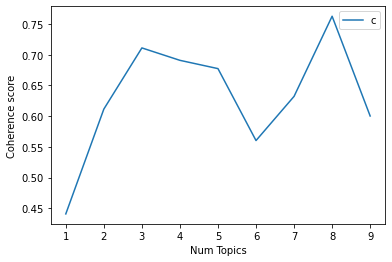

In [115]:
# Show graph

limit=10; start=1; step=1;
x = range(start, limit, step)
print (x)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#### Extra -  Create a tf-idf model

It is possible also to implements functionality related to the Term Frequency - Inverse Document Frequency:

In [116]:
#Create a Tfidf model
tfidf = TfidfModel(corpus, normalize=True)

In [117]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

[(0, 0.30582392026691746), (1, 0.18502105682693437), (2, 0.4055372510656513), (3, 0.34813062704636605), (4, 0.002088893877683687), (5, 0.17854019017682699), (6, 0.34150146984314655), (7, 0.32430472537136107), (8, 0.2526654198037836), (9, 0.3192837789280444), (10, 0.31454990470208577), (11, 0.019832578080034684), (12, 0.25051412347958096), (13, 0.07093324628885378)]
[(4, 0.0006161398610032521), (11, 0.00584981459906365), (13, 0.020922460913805146), (14, 0.16338747958182454), (15, 0.16338747958182454), (16, 0.16338747958182454), (17, 0.05759350849729513), (18, 0.09145880890511641), (19, 0.16338747958182454), (20, 0.16338747958182454), (21, 0.13654986397079774), (22, 0.1240710833524642), (23, 0.1048101340790908), (24, 0.10268456356297646), (25, 0.1048101340790908), (26, 0.11961721376688711), (27, 0.32141529944566066), (28, 0.11961721376688711), (29, 0.16338747958182454), (30, 0.16338747958182454), (31, 0.49016243874547355), (32, 0.05791707151207707), (33, 0.16338747958182454), (34, 0.1633

In [118]:
# Build LSI model - tfidf

lsi_model_tfidf = LsiModel(corpus_tfidf, id2word=dct, num_topics=25)  #initialize an LSI transformation
corpus_lsi_tfidf = lsi_model[corpus_tfidf]  #create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [119]:
lsi_model_tfidf.print_topics(25)

[(0,
  '0.416*"big" + 0.232*"celebratory" + 0.232*"australia" + 0.232*"sponsor" + 0.232*"gotta" + 0.232*"fee" + 0.232*"tonight" + 0.231*"stream" + 0.231*"accepted" + 0.228*"news"'),
 (1,
  '0.381*"woman" + 0.352*"tech" + 0.275*"learning" + 0.210*"input" + 0.210*"cybersecurity" + 0.200*"flutter" + 0.198*"serverless" + 0.197*"startup" + 0.197*"javascript" + 0.197*"iot"'),
 (2,
  '-0.392*"stfc" + -0.196*"mitigation" + -0.196*"screening" + -0.196*"targetted" + -0.196*"told" + -0.196*"hide" + -0.196*"moh" + -0.196*"sng" + -0.196*"frm" + -0.196*"urge"'),
 (3,
  '-0.249*"strategy" + -0.249*"inherently" + -0.249*"feather" + -0.249*"somebody" + -0.249*"booz" + -0.249*"ingham" + -0.249*"allen" + -0.249*"absolutely" + -0.249*"kathleen" + -0.246*"specific"'),
 (4,
  '-0.401*"probably" + -0.219*"literacy" + -0.219*"broadly" + -0.211*"refreshing" + -0.211*"unpopular" + -0.209*"calculus" + -0.208*"relevant" + -0.206*"plus" + -0.206*"basic" + -0.202*"done"'),
 (5,
  '0.623*"lidar" + 0.311*"car" + 0.30

## Difficulties faced

1. Understanding and applying the mathematical theory behind the algorithms;
2. Since the number of letters is limited in tweets, people tend to use letters as words, i.e. *U* instead of *you*. We removed letters from tweets and that can lead to loss of information;
4. Choosing the best method for selecting term and documents;
5. Lack of time due to the arrival of projects' deadline. It stopped us from putting in as much effort as we wanted.